In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/Sales_prediction_Colombia.csv

--2023-10-21 22:18:02--  https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/Sales_prediction_Colombia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24963422 (24M) [text/plain]
Saving to: ‘Sales_prediction_Colombia.csv.1’

Sales_prediction_Co 100%[===================>]  23.81M  --.-KB/s    in 0.06s   

2023-10-21 22:18:02 (391 MB/s) - ‘Sales_prediction_Colombia.csv.1’ saved [24963422/24963422]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


#https://www.kaggle.com/datasets/danieleduardofajardo/colombia-house-prediction

In [ ]:
# Cargamos y Analizamos por encima los datos
df = pd.read_csv('Sales_prediction_Colombia.csv')
df.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129076 entries, 0 to 129075
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129076 non-null  int64  
 1   antiguedad_original    129076 non-null  object 
 2   area                   129056 non-null  float64
 3   areabalcon             21572 non-null   float64
 4   areaconstruida         129056 non-null  float64
 5   areaterraza            21572 non-null   float64
 6   balcon                 69235 non-null   object 
 7   banos                  128602 non-null  float64
 8   banoservicio           1011 non-null    object 
 9   conjuntocerrado        59825 non-null   object 
 10  cuarto_de_escoltas     3306 non-null    object 
 11  cuartodeservicio       25124 non-null   object 
 12  depositoocuartoutil    50976 non-null   object 
 13  depositos              36826 non-null   object 
 14  estrato                123138 non-nu

,Unnamed: 0,antiguedad_original,area,areabalcon,areaconstruida,areaterraza,balcon,banos,banoservicio,conjuntocerrado,...,tiempodeconstruido,tipodegaraje,valor,valorventa,vigilancia,vista,zona_de_bbq,zonadelavanderia,zonaninos,zonasverdes
0,0,Entre 5 y 10 años,145.00,10.0,145.00,10.0,Terraza,3.0,NaN,NaN,...,Entre 5 y 10 años,Independiente,9.000000e+08,9.000000e+08,24hrs,Exterior,NaN,Si,NaN,NaN
1,1,Entre 0 y 5 años,114.00,NaN,114.00,NaN,NaN,3.0,NaN,NaN,...,Entre 0 y 5 años,NaN,5.481475e+08,5.481475e+08,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Entre 5 y 10 años,170.00,30.0,170.00,30.0,Terraza,4.0,NaN,Si,...,Entre 5 y 10 años,Propio,1.500000e+09,1.500000e+09,NaN,Exterior,NaN,Si,NaN,Si
3,3,Entre 0 y 5 años,61.00,NaN,61.00,NaN,Balcón,1.0,NaN,NaN,...,Entre 0 y 5 años,Independiente,4.950000e+08,4.950000e+08,24hrs,Exterior,NaN,NaN,NaN,NaN
4,4,Más de 20 años,120.50,NaN,120.50,NaN,NaN,3.0,NaN,NaN,...,Más de 20 años,Servidumbre,8.500000e+08,8.500000e+08,Si,NaN,NaN,Si,NaN,NaN
5,5,Más de 20 años,56.00,NaN,56.00,NaN,NaN,1.0,NaN,NaN,...,Más de 20 años,Propio,2.500000e+08,2.500000e+08,24hrs,Exterior,NaN,Si,NaN,NaN
6,6,Entre 0 y 5 años,58.00,NaN,58.00,NaN,NaN,2.0,NaN,Si,...,Entre 0 y 5 años,NaN,2.580000e+08,2.580000e+08,NaN,Exterior,NaN,Si,NaN,NaN
7,7,Entre 10 y 20 años,211.00,NaN,211.00,NaN,NaN,3.0,NaN,NaN,...,Entre 10 y 20 años,NaN,1.750000e+09,1.750000e+09,24hrs,NaN,NaN,Si,NaN,NaN
8,8,Entre 0 y 5 años,57.76,NaN,57.76,NaN,NaN,2.0,NaN,NaN,...,Entre 0 y 5 años,Servidumbre,3.994104e+08,3.994104e+08,24hrs,Interior,NaN,Si,NaN,NaN
9,9,Entre 0 y 5 años,225.00,NaN,225.00,NaN,Terraza,4.0,NaN,NaN,...,Entre 0 y 5 años,Independiente,2.925000e+09,2.925000e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'antiguedad_original', 'area', 'areabalcon',
       'areaconstruida', 'areaterraza', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuarto_de_escoltas', 'cuartodeservicio',
       'depositoocuartoutil', 'depositos', 'estrato', 'estudioobiblioteca',
       'garajecubierto', 'garajes', 'gimnasio', 'habitaciones',
       'halldealcobasoestar', 'instalaciondegas', 'jacuzzi', 'jardin',
       'latitud', 'longitud', 'numeroascensores', 'parqueaderovisitantes',
       'piscina', 'plantaelectrica', 'porteriaovigilancia', 'remodelado',
       'saloncomunal', 'sauna_yo_turco', 'terraza', 'tiempodeconstruido',
       'tipodegaraje', 'valor', 'valorventa', 'vigilancia', 'vista',
       'zona_de_bbq', 'zonadelavanderia', 'zonaninos', 'zonasverdes'],
      dtype='object')

Notamos que hay varias columnas repetidas, es decir, tienen los mismo valores a lo largo de su contenido, como lo son:

"antiguedad_original" = "tiempodeconstruido"

"area" = "areaconstruida"

"areabalcon" = "areaterraza"

"valor" = "valorventa"

Vamos a verificar esta redundancia...

In [ ]:
# Miramos si todos los valores entre dos columnas son iguales
# Si no todos los valores son iguales, miramos el porcentaje de similitud
# Y finalmente vemos cuales son los datos diferentes
columnas = [("antiguedad_original", "tiempodeconstruido"),
            ("area", "areaconstruida"),
            ("areabalcon", "areaterraza"),
            ("valor", "valorventa")]

for col1, col2 in columnas:
    datosIguales = (df[col1] == df[col2]).all()
    porcentaje_coincidencia = (df[col1] == df[col2]).mean() * 100
    datos_sin_coincidencia = df.loc[df[col1] != df[col2], [col1, col2]]

    print(f"\nPara {col1} y {col2}:")
    print("\nDatos iguales?: ", datosIguales)
    print("\nPorcentaje de datos iguales?: ", porcentaje_coincidencia,"%")
    print("\nDatos sin coincidencia\n", datos_sin_coincidencia.head())
    print("\n")



Para antiguedad_original y tiempodeconstruido:

Datos iguales?:  False

Porcentaje de datos iguales?:  77.01431714648734 %

Datos sin coincidencia
    antiguedad_original  tiempodeconstruido
16        16 a 30 años  Entre 10 y 20 años
18      Menos de 1 año    Entre 0 y 5 años
20      Menos de 1 año    Entre 0 y 5 años
29      Más de 30 años      Más de 20 años
32        16 a 30 años  Entre 10 y 20 años



Para area y areaconstruida:

Datos iguales?:  False

Porcentaje de datos iguales?:  99.98450525271933 %

Datos sin coincidencia
        area  areaconstruida
3097    NaN             NaN
9710    NaN             NaN
11850   NaN             NaN
27478   NaN             NaN
28471   NaN             NaN



Para areabalcon y areaterraza:

Datos iguales?:  False

Porcentaje de datos iguales?:  16.71263441693266 %

Datos sin coincidencia
    areabalcon  areaterraza
1         NaN          NaN
3         NaN          NaN
4         NaN          NaN
5         NaN          NaN
6         NaN          

Vemos que la mayoria de columnas sospechosas de ser identicas, tiene un alto porcentaje de similitud entre los datos, en el caso de "areabalcon" y "areaterraza" vemos que hay solo un 16.7% de similitud, pero al ver los datos sin coincidencia vemos que son datos NaN, mas adelante vamos a ver que estas dos columnas tienen casi la misma cantidad de datos faltantes

Vamos a ver cuantos datos faltantes hay en las columnas que le hacen falta almenos 1 dato

In [ ]:
# datos faltantes
k = df.isna().sum()

# Cuantos datos faltantes en cada columna
faltantes = k[k!=0]

print(faltantes)

area                         20
areabalcon               107504
areaconstruida               20
areaterraza              107504
balcon                    59841
banos                       474
banoservicio             128065
conjuntocerrado           69251
cuarto_de_escoltas       125770
cuartodeservicio         103952
depositoocuartoutil       78100
depositos                 92250
estrato                    5938
estudioobiblioteca        76264
garajecubierto            65758
garajes                   12370
gimnasio                  92970
habitaciones                  9
halldealcobasoestar       86775
instalaciondegas          41716
jacuzzi                  123680
jardin                   123535
numeroascensores          54877
parqueaderovisitantes    113407
piscina                  118108
plantaelectrica          127033
porteriaovigilancia       49488
saloncomunal              57274
sauna_yo_turco           120063
terraza                   64233
tipodegaraje              66500
vigilanc

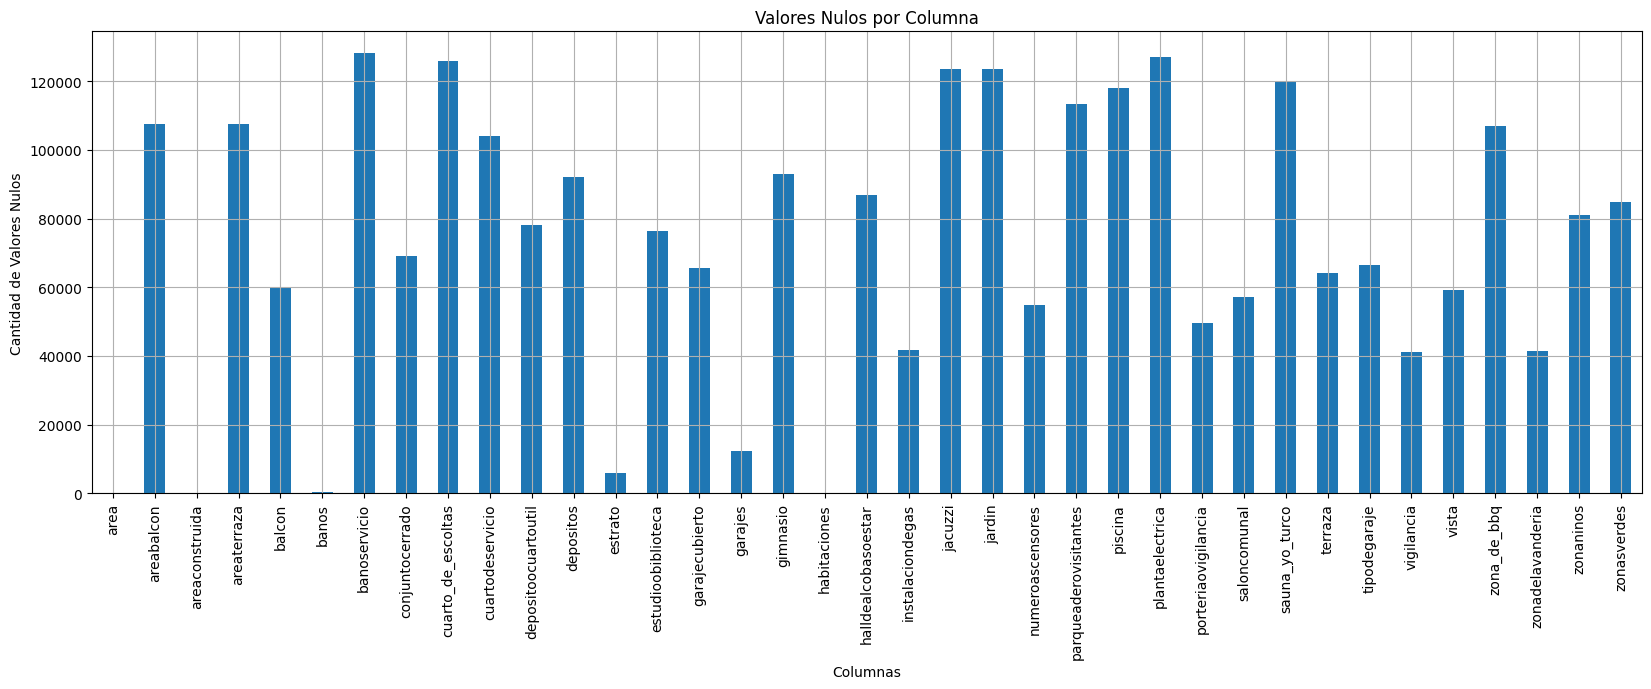

In [ ]:
# Para visualizar los datos faltantes
plt.figure(figsize=(20, 6))
faltantes.plot(kind='bar')
plt.title("Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Valores Nulos")
plt.grid()
plt.show()

Con esta informacion de datos faltantes e igualdad en varias columnas, vamos a eliminar las columnas con mas del 60% de datos faltantes y una de las columnas repetidas que tenga mayor numero de datos faltantes. Todo esto lo haremos sobre un dataset copia llamado dfPre

In [ ]:
umbral = 0.6

dfPre = df.copy()

columnasAntes = dfPre.shape[1]

# Se eliminan las columnas con mas de 60% de datos faltantes
columnas_a_eliminar = dfPre.columns[dfPre.isnull().mean() > umbral]
dfPre = dfPre.drop(columnas_a_eliminar, axis=1)

# Se eliminan las columnas repetidas
for columna1, columna2 in columnas:
    if columna1 in dfPre.columns and columna2 in dfPre.columns:
        nulos_columna1 = dfPre[columna1].isnull().sum()
        nulos_columna2 = dfPre[columna2].isnull().sum()

        if nulos_columna1 > nulos_columna2:
            dfPre = dfPre.drop(columna1, axis=1)  # Elimina la primera columna si tiene más valores nulos
        else:
            dfPre = dfPre.drop(columna2, axis=1)

columnasDespues = dfPre.shape[1]

print("Columnas antes de limpieza: ", columnasAntes)
print("Columnas despues de limpieza: ", columnasDespues)
dfPre

Columnas antes de limpieza:  45
Columnas despues de limpieza:  24


,Unnamed: 0,antiguedad_original,area,balcon,banos,conjuntocerrado,estrato,estudioobiblioteca,garajecubierto,garajes,...,numeroascensores,porteriaovigilancia,remodelado,saloncomunal,terraza,tipodegaraje,valor,vigilancia,vista,zonadelavanderia
0,0,Entre 5 y 10 años,145.0,Terraza,3.0,NaN,6.0,Si,Si,2.0,...,2.0,24hrs,No,NaN,Terraza,Independiente,9.000000e+08,24hrs,Exterior,Si
1,1,Entre 0 y 5 años,114.0,NaN,3.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,No,NaN,NaN,NaN,5.481475e+08,NaN,NaN,NaN
2,2,Entre 5 y 10 años,170.0,Terraza,4.0,Si,6.0,Si,Si,3.0,...,1.0,NaN,No,Si,Terraza,Propio,1.500000e+09,NaN,Exterior,Si
3,3,Entre 0 y 5 años,61.0,Balcón,1.0,NaN,6.0,NaN,Si,1.0,...,1.0,24hrs,No,Si,Balcón,Independiente,4.950000e+08,24hrs,Exterior,NaN
4,4,Más de 20 años,120.5,NaN,3.0,NaN,NaN,Si,NaN,2.0,...,NaN,Si,No,NaN,NaN,Servidumbre,8.500000e+08,Si,NaN,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129071,130746,Entre 5 y 10 años,260.0,Ninguno,3.0,NaN,6.0,Si,Si,2.0,...,1.0,24hrs,No,NaN,Ninguno,Servidumbre,1.450000e+09,24hrs,NaN,Si
129072,130747,Entre 5 y 10 años,166.0,Terraza,4.0,Si,4.0,Si,Si,2.0,...,2.0,24hrs,No,Si,Terraza,Servidumbre,6.000000e+08,24hrs,Exterior,Si
129073,130748,Entre 5 y 10 años,87.0,Ninguno,2.0,Si,3.0,Si,NaN,1.0,...,1.0,24hrs,No,Si,Ninguno,NaN,3.400000e+08,24hrs,Exterior,NaN
129074,130749,Entre 0 y 5 años,55.0,Balcón,2.0,NaN,4.0,NaN,Si,1.0,...,1.0,24hrs,No,Si,Balcón,Independiente,3.712500e+08,24hrs,Exterior,Si


Ahora vamos a ver las columnas que quedaron, para analizar que podemos hacer con los datos faltantes

In [ ]:
# datos faltantes
k = dfPre.isna().sum()

# Cuantos datos faltantes en cada columna
faltantes = k[k!=0]

print(faltantes)

area                      20
balcon                 59841
banos                    474
conjuntocerrado        69251
estrato                 5938
estudioobiblioteca     76264
garajecubierto         65758
garajes                12370
habitaciones               9
instalaciondegas       41716
numeroascensores       54877
porteriaovigilancia    49488
saloncomunal           57274
terraza                64233
tipodegaraje           66500
vigilancia             41221
vista                  59288
zonadelavanderia       41323
dtype: int64


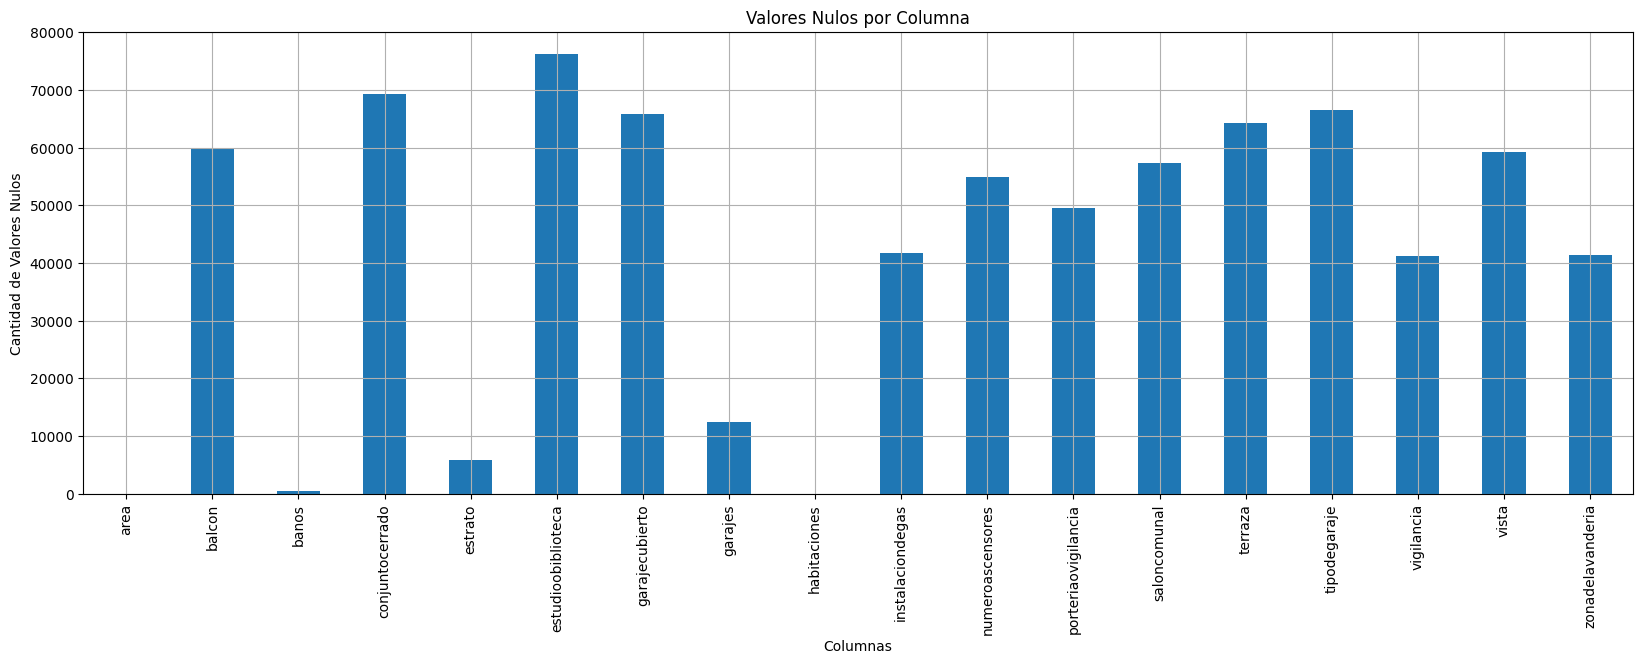

In [ ]:
# Para visualizar los datos faltantes
plt.figure(figsize=(20, 6))
faltantes.plot(kind='bar')
plt.title("Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Valores Nulos")
plt.grid()
plt.show()

Vamos a ver que tipo de relaciones podemos encontrar para ver que podemos hacer con los datos faltantes

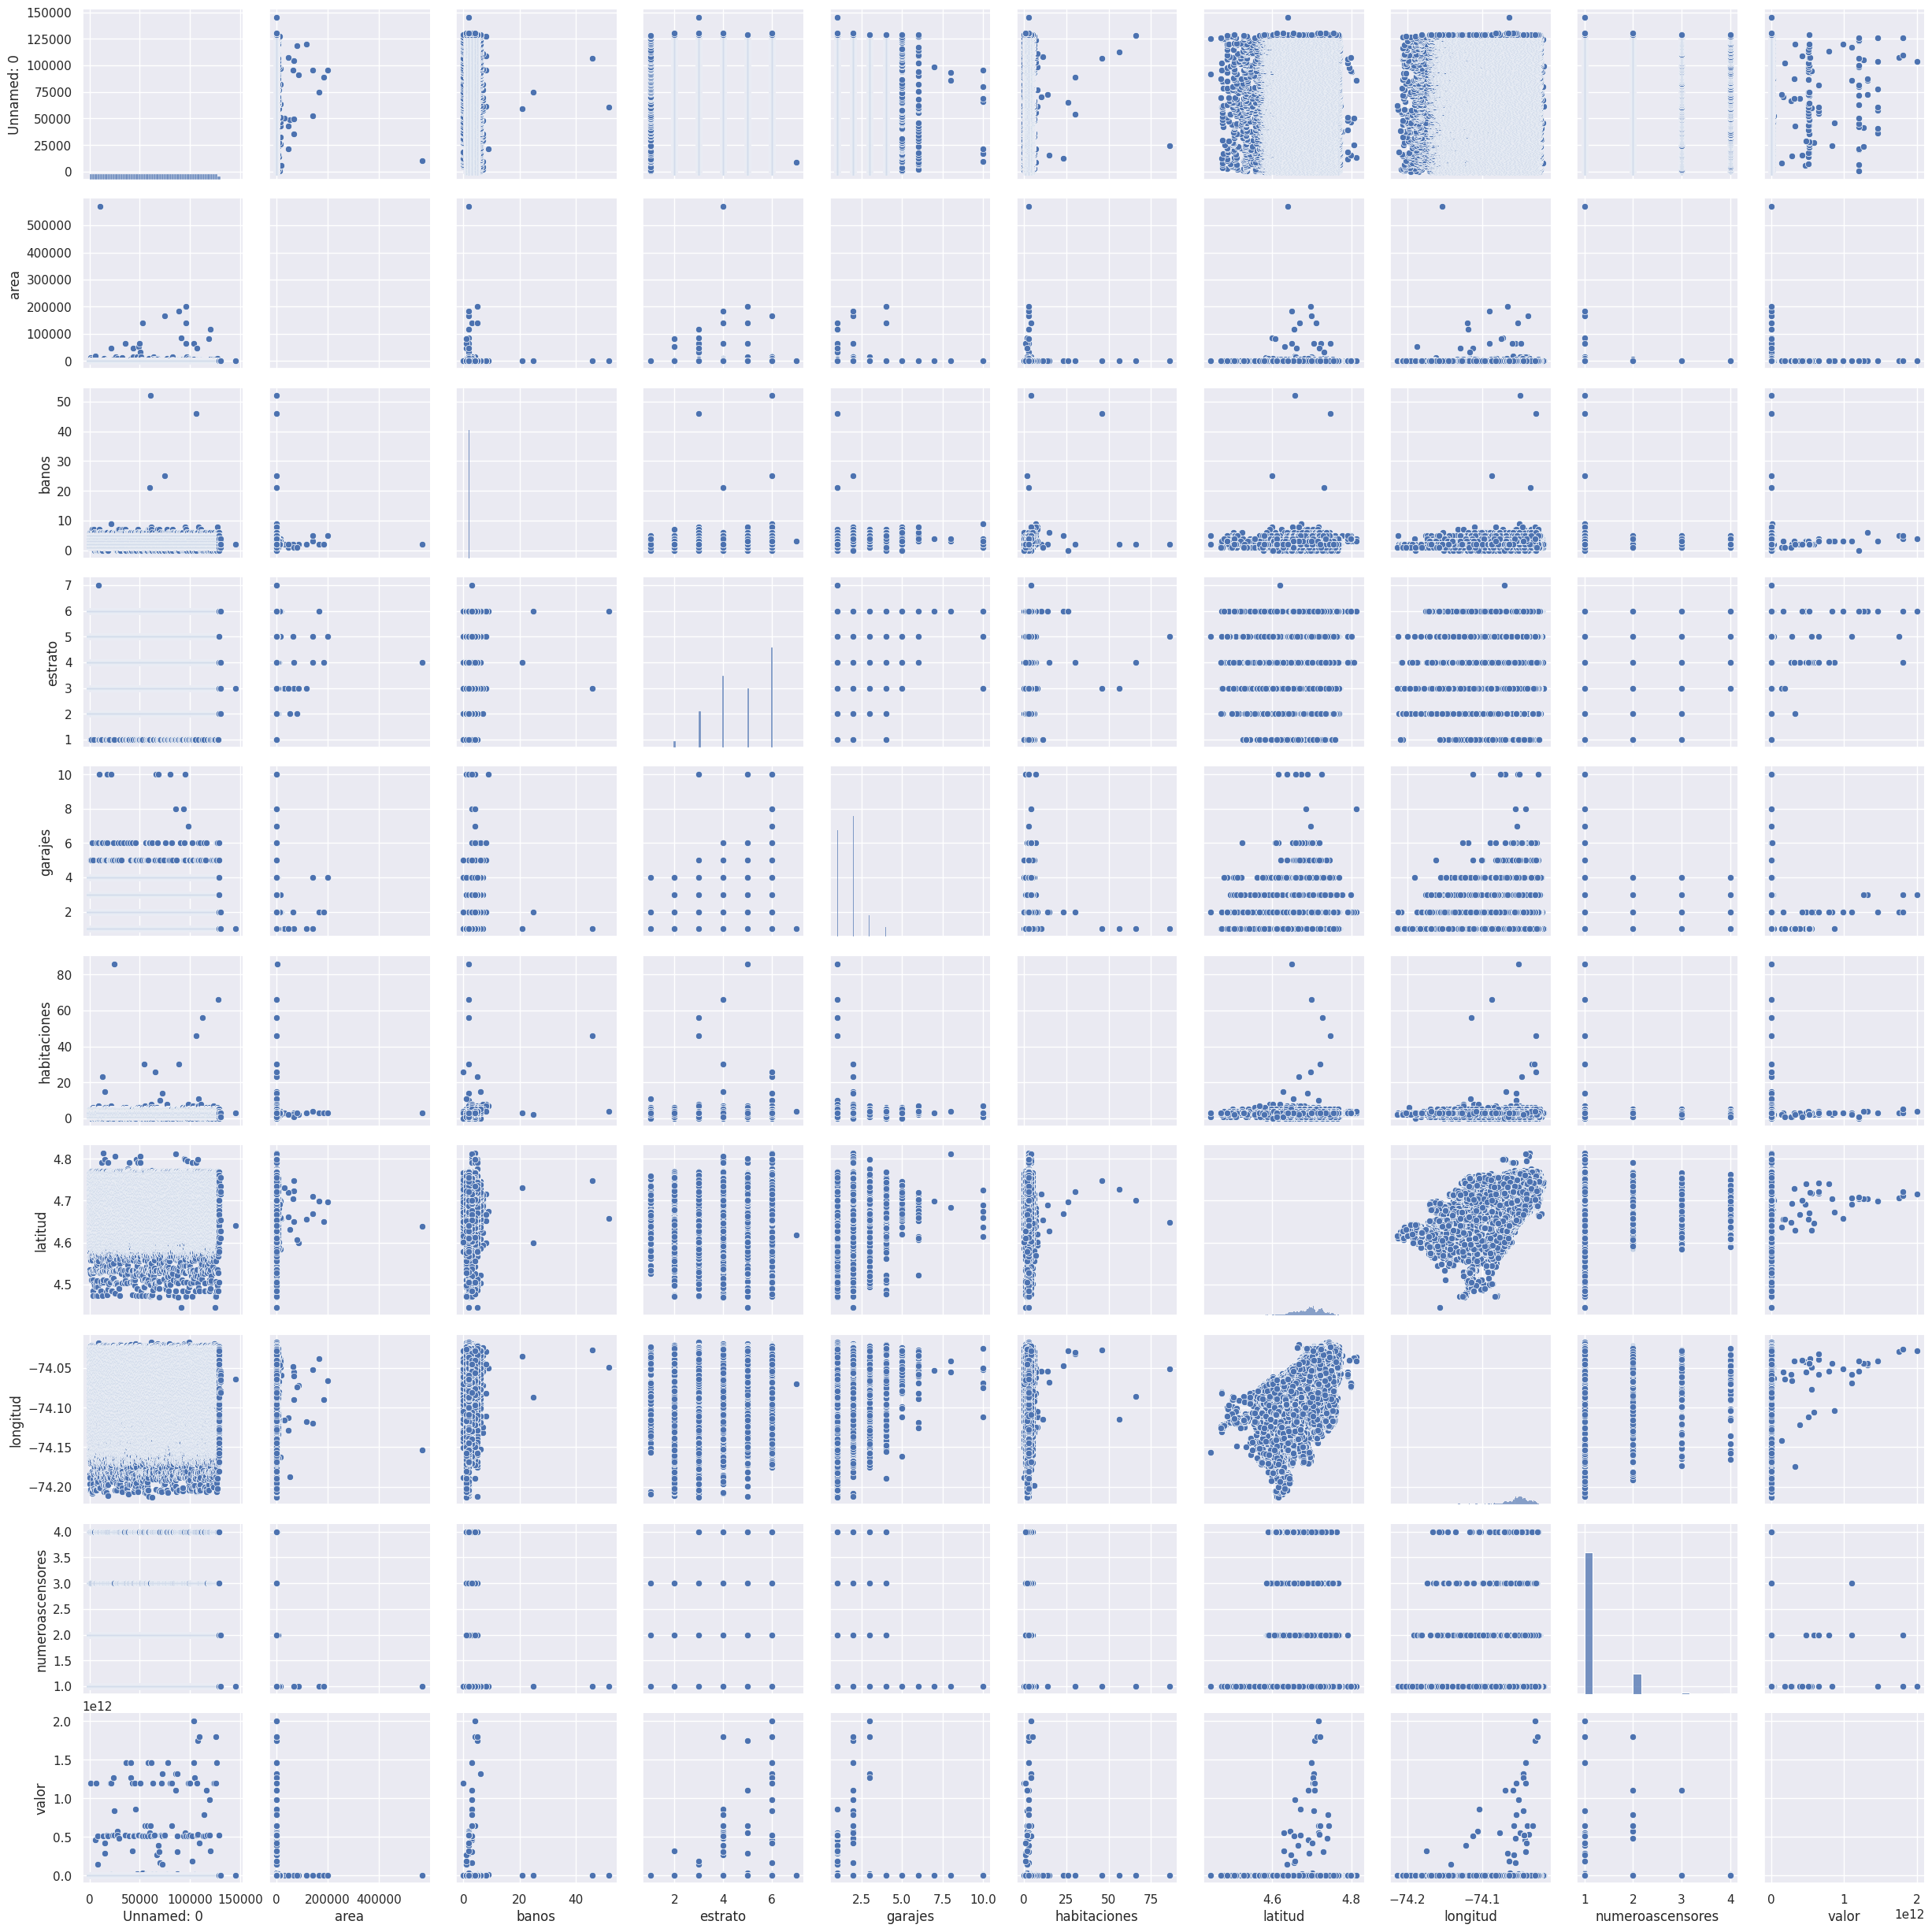

In [ ]:
# Filtra solo las columnas numéricas
numeric_dfPre = dfPre.select_dtypes(include=['number'])

# Crea el pairplot para las variables numéricas
sns.set()
sns.pairplot(numeric_dfPre)


Vemos que hay muchas areas en cero, y pues no tiene sentido que sean iguales a cero, asi que lo que vamos a hacer es cambiar esos valores de cero a valores promedio de area dependiendo de los estratos, es decir, vamos a calcular las areas promedio de cada estrato y vamos a sustituir los valores en cero por los valores promedio dependiendo del estrato de cada fila, ademas tambien vamos a limitar las areas a 8000. Vamos a mejorar la columna area, ya que consideramos de que es una caracteristica que puede influir en el precio de una casa

Tambien vemos que hay datos raros en baños, llegando incluso a mas de 40 baños, asi que vamos a limitar los baños, desde 0 a 8 baños, ya que como vemos en la siguiente celda, es muy raro tener mas de 8 baños, y vamos a dejar datos de 0 baños ya que es posible de que en algunas casas en Colombia no hallan baños

Tambien vamos a limitar los garajes entre 0 y 5, ya que apartir de mas garajes no hay como un cambio significativo de valor, o almenos eso nos dice la grafica

Y tambien vamos a limitar el numero de habitaciones a 7

In [ ]:
# Cambiando valores de Area

# Valores promedio de 'area' por estrato
promedios_por_estrato = dfPre[dfPre['area'] > 0].groupby('estrato')['area'].mean()

# Reemplazar los valores en cero
for index, row in dfPre.iterrows():
    if row['area'] == 0:
        estrato = row['estrato']
        if estrato in promedios_por_estrato:
            dfPre.at[index, 'area'] = promedios_por_estrato[estrato]



Baños
 2.0    57765
3.0    35954
4.0    15379
1.0    12212
5.0     6990
0.0      585
6.0      162
7.0       20
8.0        9
Name: banos, dtype: int64

Garajes
 2.0    54417
1.0    47983
0.0    12370
3.0     9838
4.0     4338
5.0      130
Name: garajes, dtype: int64

Habitaciones
 3.0    72908
2.0    33322
1.0    13645
4.0     8350
5.0      697
0.0      109
7.0       23
6.0       22
Name: habitaciones, dtype: int64


<ipython-input-117-821c15e56786>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfPre['area'], shade=True)


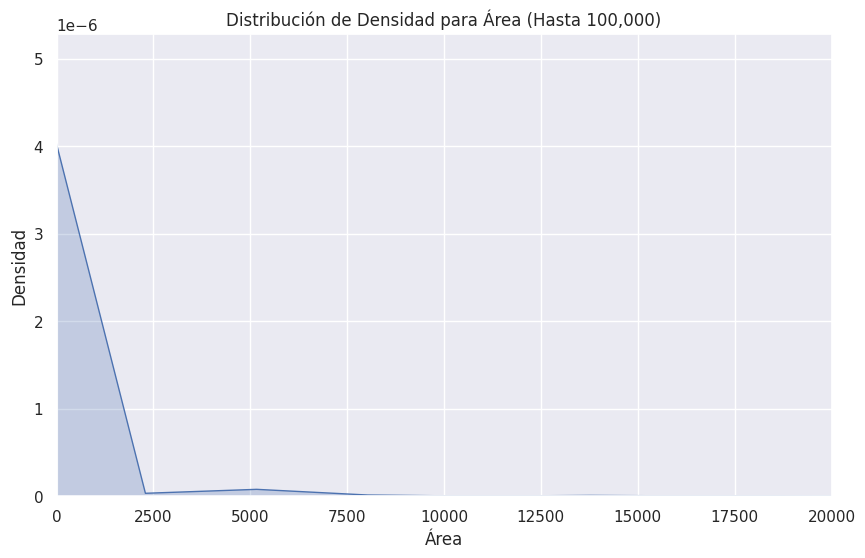

In [ ]:
# ocurrencias
conteoBaños = dfPre['banos'].value_counts()
print("\nBaños\n",conteoBaños)

conteoGarajes = dfPre['garajes'].value_counts()
print("\nGarajes\n",conteoGarajes)

conteoHabitaciones = dfPre['habitaciones'].value_counts()
print("\nHabitaciones\n",conteoHabitaciones)

conteoArea = dfPre['area'].value_counts()
# Graficar una distribución de densidad para 'area' limitada a 100,000
plt.figure(figsize=(10, 6))
sns.kdeplot(dfPre['area'], shade=True)
plt.title('Distribución de Densidad para Área (Hasta 100,000)')
plt.xlabel('Área')
plt.ylabel('Densidad')
plt.xlim(0, 20000)  # Limitar el eje x hasta 100,000
plt.show()

In [ ]:
# Limitando baños
dfPre['banos'] = dfPre['banos'].apply(lambda x: min(8, max(0, x)))

# Limitando garajes
dfPre['garajes'] = dfPre['garajes'].apply(lambda x: min(5, max(0, x)))

# Limitando habitaciones
dfPre['habitaciones'] = dfPre['habitaciones'].apply(lambda x: min(7, max(0, x)))

# Limitando areas
dfPre['area'] = dfPre['area'].apply(lambda x: min(8000, max(0, x)))

Vamos a ver de nuevo las graficas VS con los cambios hechos

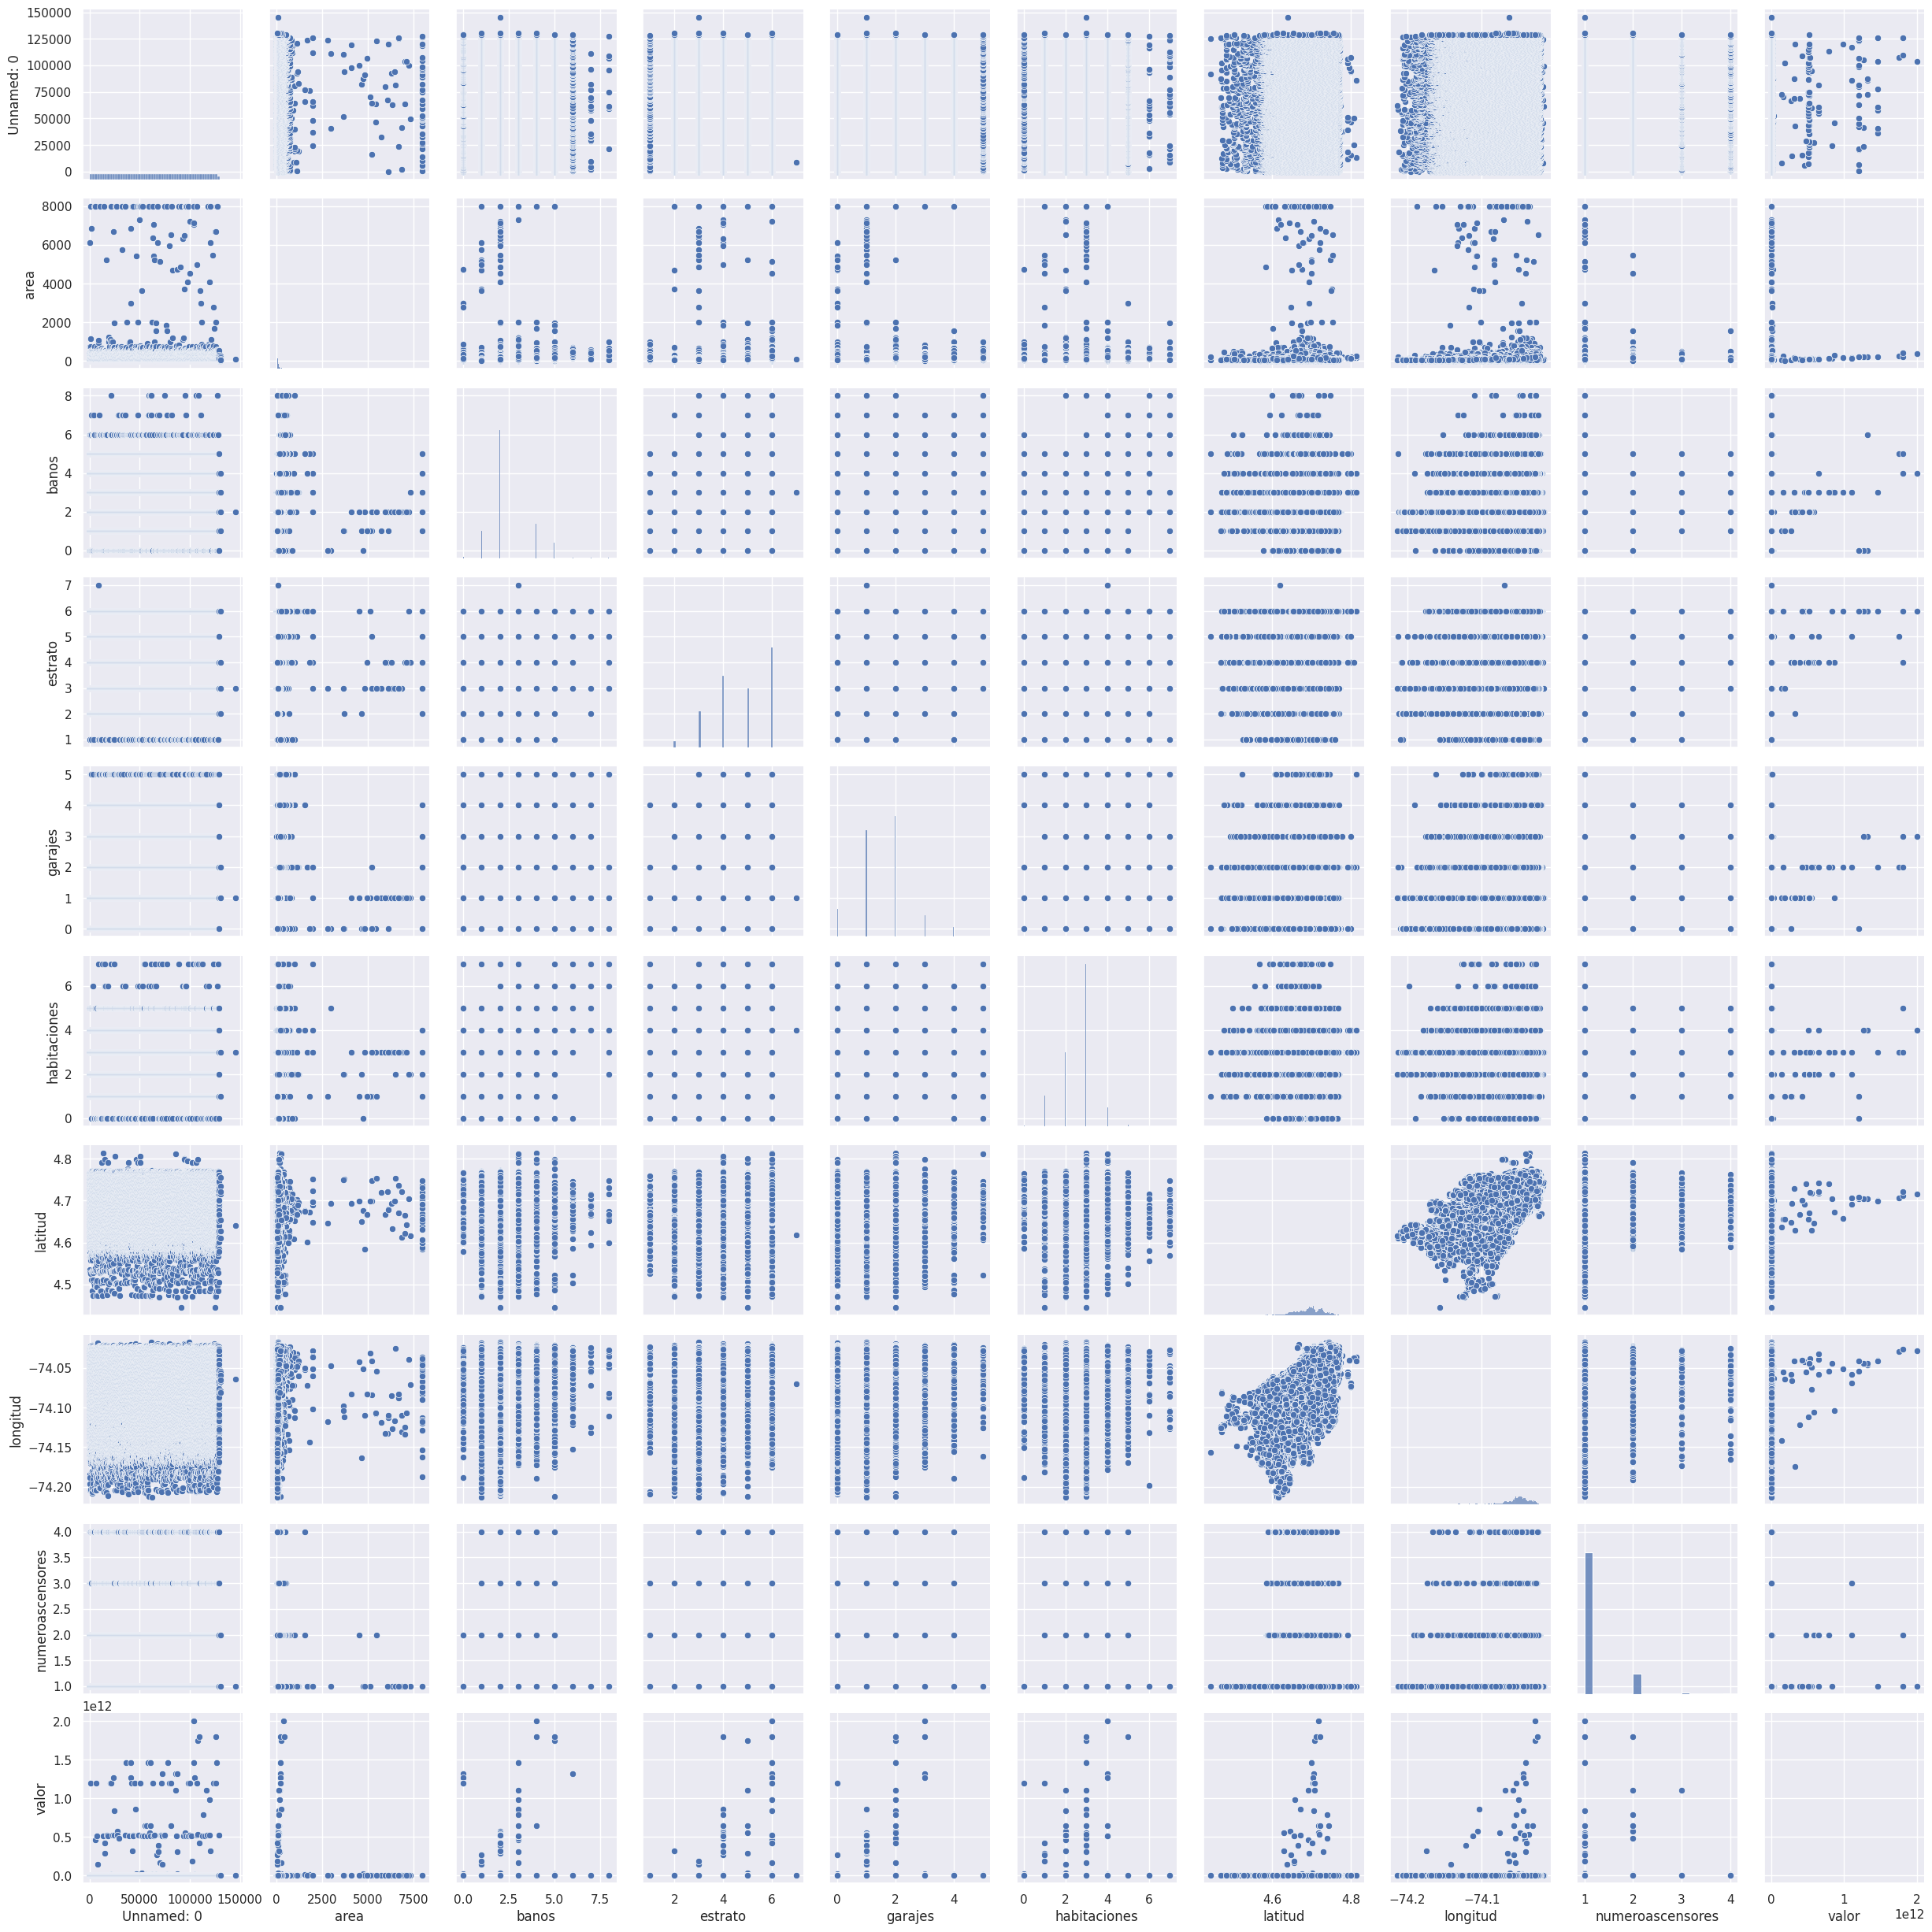

In [ ]:
# Filtra solo las columnas numéricas
numeric_dfPre = dfPre.select_dtypes(include=['number'])

# Crea el pairplot para las variables numéricas
sns.set()
sns.pairplot(numeric_dfPre)

Con esta grafica luego del preprocesado de datos numericos, podemos ver mejor las variables que influyen en el precio de una casa

In [ ]:
dfPre

,Unnamed: 0,antiguedad_original,area,balcon,banos,conjuntocerrado,estrato,estudioobiblioteca,garajecubierto,garajes,...,numeroascensores,porteriaovigilancia,remodelado,saloncomunal,terraza,tipodegaraje,valor,vigilancia,vista,zonadelavanderia
0,0,Entre 5 y 10 años,145.0,Terraza,3.0,NaN,6.0,Si,Si,2.0,...,2.0,24hrs,No,NaN,Terraza,Independiente,9.000000e+08,24hrs,Exterior,Si
1,1,Entre 0 y 5 años,114.0,NaN,3.0,NaN,4.0,NaN,NaN,0.0,...,NaN,NaN,No,NaN,NaN,NaN,5.481475e+08,NaN,NaN,NaN
2,2,Entre 5 y 10 años,170.0,Terraza,4.0,Si,6.0,Si,Si,3.0,...,1.0,NaN,No,Si,Terraza,Propio,1.500000e+09,NaN,Exterior,Si
3,3,Entre 0 y 5 años,61.0,Balcón,1.0,NaN,6.0,NaN,Si,1.0,...,1.0,24hrs,No,Si,Balcón,Independiente,4.950000e+08,24hrs,Exterior,NaN
4,4,Más de 20 años,120.5,NaN,3.0,NaN,NaN,Si,NaN,2.0,...,NaN,Si,No,NaN,NaN,Servidumbre,8.500000e+08,Si,NaN,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129071,130746,Entre 5 y 10 años,260.0,Ninguno,3.0,NaN,6.0,Si,Si,2.0,...,1.0,24hrs,No,NaN,Ninguno,Servidumbre,1.450000e+09,24hrs,NaN,Si
129072,130747,Entre 5 y 10 años,166.0,Terraza,4.0,Si,4.0,Si,Si,2.0,...,2.0,24hrs,No,Si,Terraza,Servidumbre,6.000000e+08,24hrs,Exterior,Si
129073,130748,Entre 5 y 10 años,87.0,Ninguno,2.0,Si,3.0,Si,NaN,1.0,...,1.0,24hrs,No,Si,Ninguno,NaN,3.400000e+08,24hrs,Exterior,NaN
129074,130749,Entre 0 y 5 años,55.0,Balcón,2.0,NaN,4.0,NaN,Si,1.0,...,1.0,24hrs,No,Si,Balcón,Independiente,3.712500e+08,24hrs,Exterior,Si


Ahora vamos a preprocesar las variables categoricas, hechemos un vistazo

In [ ]:
# variables categoricas
ccols = [i for i in dfPre.columns if not i in dfPre._get_numeric_data()]
print (ccols)

['antiguedad_original', 'balcon', 'conjuntocerrado', 'estudioobiblioteca', 'garajecubierto', 'instalaciondegas', 'porteriaovigilancia', 'remodelado', 'saloncomunal', 'terraza', 'tipodegaraje', 'vigilancia', 'vista', 'zonadelavanderia']


In [ ]:
# inspeccionando las variables categoricas
for c in ccols:
    print ("%10s"%c, np.unique(dfPre[c].dropna()))

antiguedad_original ['1 a 8 años' '16 a 30 años' '9 a 15 años' 'Entre 0 y 5 años'
 'Entre 10 y 20 años' 'Entre 5 y 10 años' 'Menos de 1 año'
 'Más de 20 años' 'Más de 30 años' 'Remodelado']
    balcon ['Balcón' 'Ninguno' 'Si' 'Terraza']
conjuntocerrado ['Si']
estudioobiblioteca ['Si']
garajecubierto ['Si']
instalaciondegas ['Natural' 'Ninguno' 'Propano' 'Si']
porteriaovigilancia ['12hrs' '24hrs' 'Si']
remodelado ['No' 'Si']
saloncomunal ['Si']
   terraza ['Balcón' 'Ninguno' 'Si' 'Terraza']
tipodegaraje ['Comunal' 'Independiente' 'Propio' 'Servidumbre']
vigilancia ['12hrs' '24hrs' 'Si']
     vista ['Exterior' 'Interior']
zonadelavanderia ['Si']


Lo primero que vamos a hacer aqui es cambiar los datos de antiguedad_original de categoricas a numericas, tratando de encapsular de forma adecuada la antiguedad de cada casa, ya que como esta es muy confuso

In [ ]:

# mapear los rangos de antigüedad a intervalos de 5 años
def convertir_antiguedad(rango):
    if 'Menos de 1 año' in rango:
        return 0
    elif '1 a 8 años' in rango:
        return 5
    elif '9 a 15 años' in rango:
        return 10
    elif 'Entre 0 y 5 años' in rango:
        return 5
    elif 'Entre 5 y 10 años' in rango:
        return 10
    elif 'Entre 10 y 20 años' in rango:
        return 15
    elif 'Más de 20 años' in rango:
        return 20
    elif '16 a 30 años' in rango:
        return 25
    elif 'Más de 30 años' in rango:
        return 30
    elif 'Remodelado' in rango:
        return 35
    else:
        return None  # En caso de un valor desconocido

# Aplica la función al DataFrame
dfPre['antiguedad_original'] = dfPre['antiguedad_original'].apply(convertir_antiguedad)

# Verifica el resultado
print(dfPre[['antiguedad_original']])


        antiguedad_original
0                        10
1                         5
2                        10
3                         5
4                        20
...                     ...
129071                   10
129072                   10
129073                   10
129074                    5
129075                   30

[129076 rows x 1 columns]


Ahora que convertimos antiguedad_original en datos numericos, vamos a ver una grafica de valor vs antiguedad_original

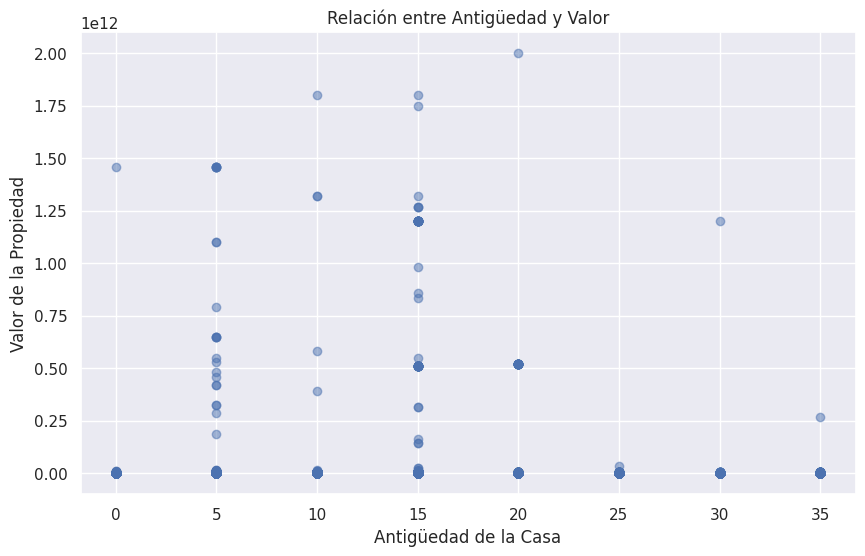

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado dfPre
# y las columnas se llaman "antiguedad_original" y "valor"
plt.figure(figsize=(10, 6))
plt.scatter(dfPre['antiguedad_original'], dfPre['valor'], alpha=0.5)  # alpha controla la transparencia de los puntos
plt.title('Relación entre Antigüedad y Valor')
plt.xlabel('Antigüedad de la Casa')
plt.ylabel('Valor de la Propiedad')
plt.grid(True)
plt.show()


Segun la grafica una casa de menos de 5 años y se podria incluso deducir que una casa de menos de 15 años de antiguedad es mejor valorada, que las casas que son mas antiguas que 15 años

Ahora vamos a ver una grafica que relaciona la columna valor con las columnas categoricas, pero solo las columnas que tengan mas de una opcion de valor

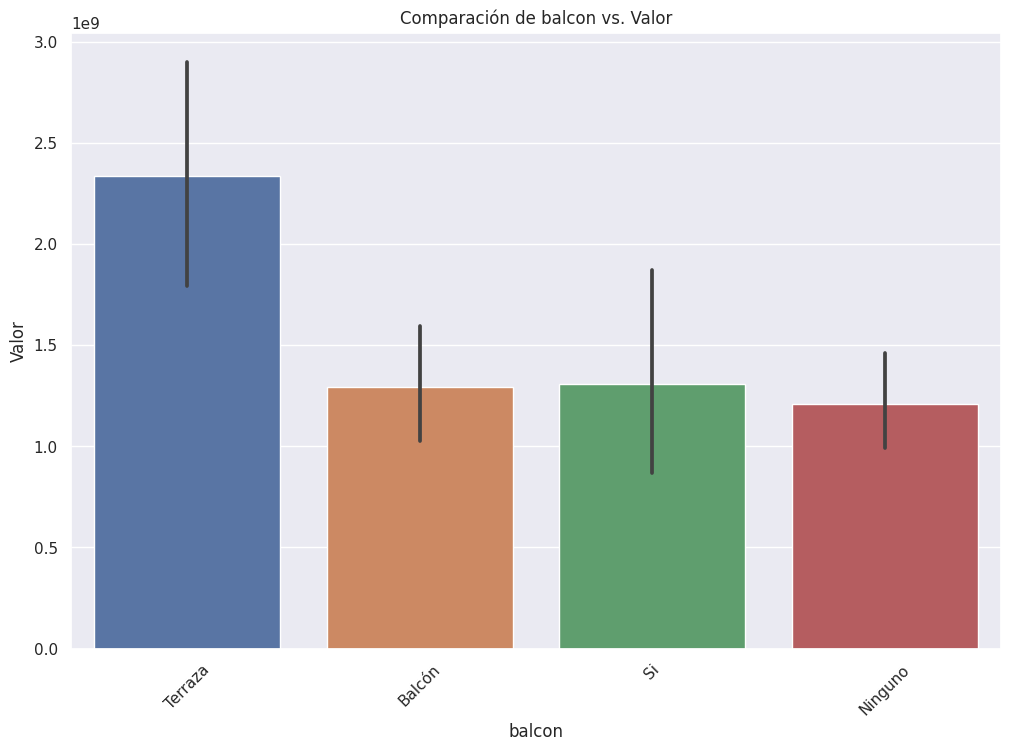

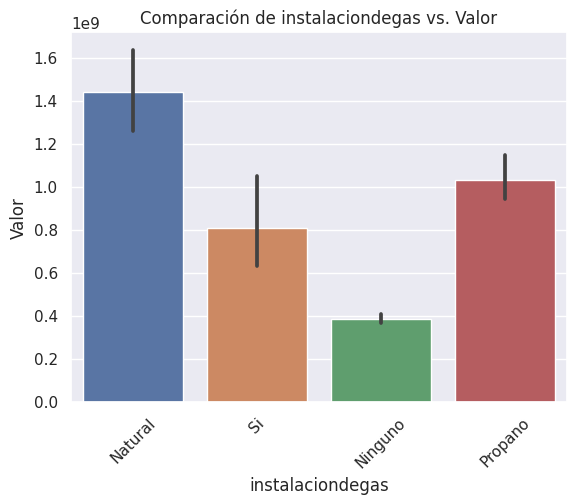

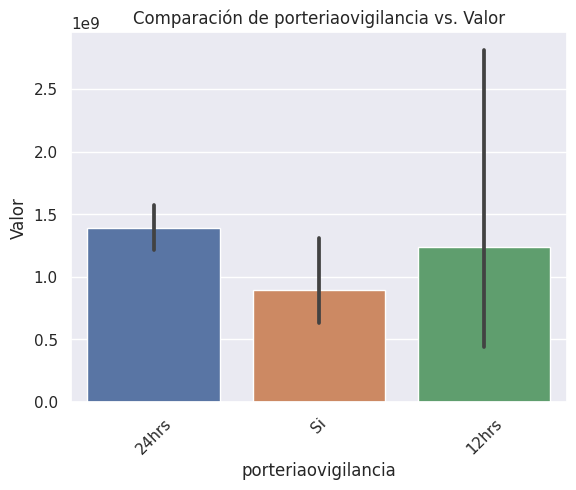

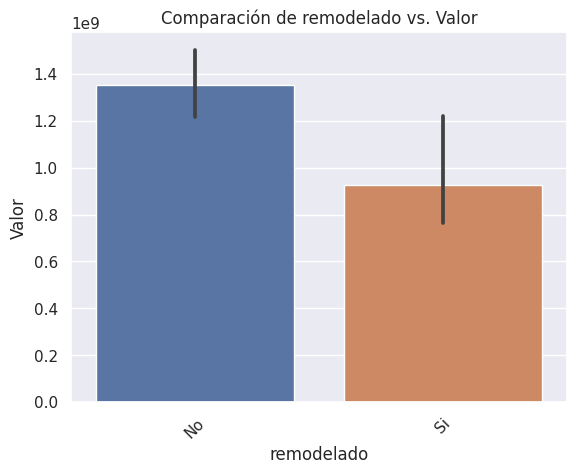

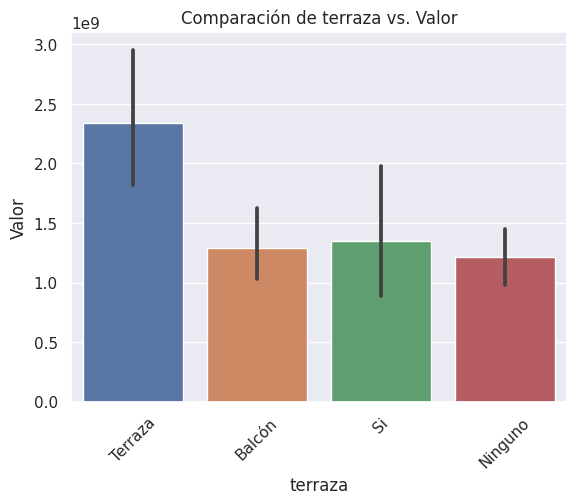

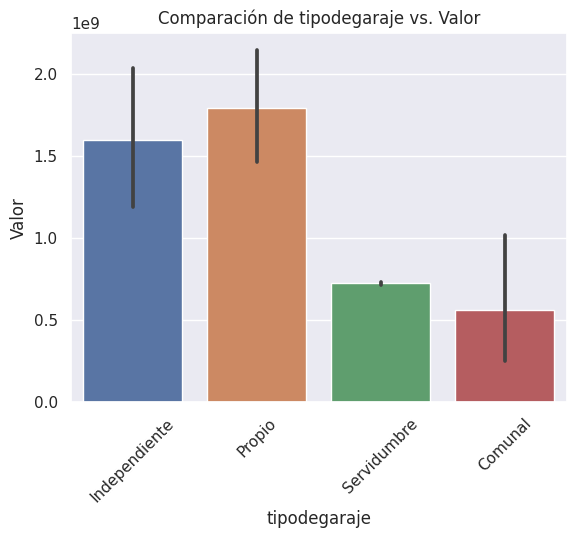

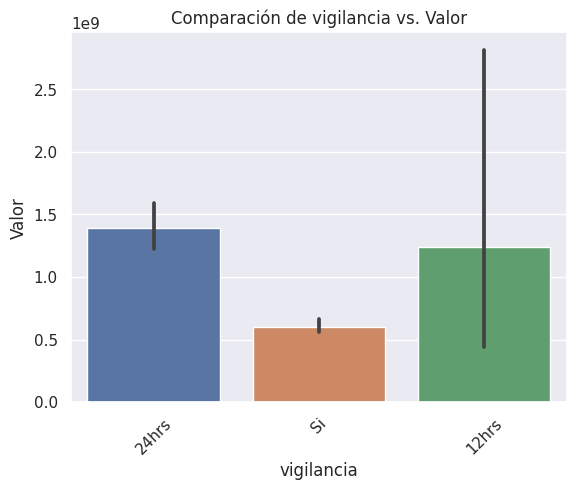

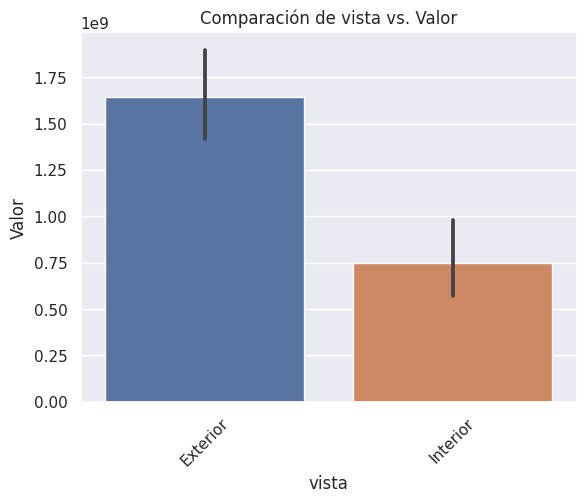

In [ ]:
# Obtiene una lista de todas las columnas categóricas
categorical_columns = dfPre.select_dtypes(include=['object']).columns

# Lista para almacenar las columnas que tienen más de un valor único
valid_categorical_columns = []

# Filtra las columnas categóricas que tienen más de un valor único
for column in categorical_columns:
    unique_values = dfPre[column].nunique()
    if unique_values > 1:
        valid_categorical_columns.append(column)

# Ajusta el tamaño de la figura según tus necesidades
plt.figure(figsize=(12, 8))

# Itera a través de las columnas categóricas válidas y crea gráficos de barras
for column in valid_categorical_columns:
    sns.barplot(x=column, y='valor', data=dfPre)
    plt.title(f'Comparación de {column} vs. Valor')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)  # Para rotar las etiquetas en el eje x si es necesario
    plt.show()



Con este primer vistazo vemos datos muy interesantes, pero que debemos analizar ya que pueden no tener sentido por lso datos del dataset, pero las siguientes caracteristicas son interesantes para saber el alto valor de una casa:

Si se tiene balcon, especificamente que sea una terraza.

Si tiene vista exterior

In [ ]:
dfPre

,Unnamed: 0,antiguedad_original,area,balcon,banos,conjuntocerrado,estrato,estudioobiblioteca,garajecubierto,garajes,...,numeroascensores,porteriaovigilancia,remodelado,saloncomunal,terraza,tipodegaraje,valor,vigilancia,vista,zonadelavanderia
0,0,10,145.0,Terraza,3.0,NaN,6.0,Si,Si,2.0,...,2.0,24hrs,No,NaN,Terraza,Independiente,9.000000e+08,24hrs,Exterior,Si
1,1,5,114.0,NaN,3.0,NaN,4.0,NaN,NaN,0.0,...,NaN,NaN,No,NaN,NaN,NaN,5.481475e+08,NaN,NaN,NaN
2,2,10,170.0,Terraza,4.0,Si,6.0,Si,Si,3.0,...,1.0,NaN,No,Si,Terraza,Propio,1.500000e+09,NaN,Exterior,Si
3,3,5,61.0,Balcón,1.0,NaN,6.0,NaN,Si,1.0,...,1.0,24hrs,No,Si,Balcón,Independiente,4.950000e+08,24hrs,Exterior,NaN
4,4,20,120.5,NaN,3.0,NaN,NaN,Si,NaN,2.0,...,NaN,Si,No,NaN,NaN,Servidumbre,8.500000e+08,Si,NaN,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129071,130746,10,260.0,Ninguno,3.0,NaN,6.0,Si,Si,2.0,...,1.0,24hrs,No,NaN,Ninguno,Servidumbre,1.450000e+09,24hrs,NaN,Si
129072,130747,10,166.0,Terraza,4.0,Si,4.0,Si,Si,2.0,...,2.0,24hrs,No,Si,Terraza,Servidumbre,6.000000e+08,24hrs,Exterior,Si
129073,130748,10,87.0,Ninguno,2.0,Si,3.0,Si,NaN,1.0,...,1.0,24hrs,No,Si,Ninguno,NaN,3.400000e+08,24hrs,Exterior,NaN
129074,130749,5,55.0,Balcón,2.0,NaN,4.0,NaN,Si,1.0,...,1.0,24hrs,No,Si,Balcón,Independiente,3.712500e+08,24hrs,Exterior,Si
